## Installing librosa (mono channel) and importing libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython.display as ipd
import librosa

Loading First audio wav

In [7]:
filename_1='C:\\Users\\suriy\\Murtiwala ML Internship\\Audios\\StarWars.wav'

In [8]:
# Starawar song audio
x_1 , sr_1 = librosa.load(filename_1)
ipd.Audio(filename_1)

Loading Second audio wav

In [9]:
filename_2='C:\\Users\\suriy\\Murtiwala ML Internship\\Audios\\Cantina.wav'

In [10]:
x_2, sr_2 = librosa.load(filename_2)
ipd.Audio(filename_2)

### Data value (-1 to +1) and sample rates( no. of sapmles per sec in audio) of Audios

In [11]:
# Audio array and sample rate
print(x_1)
print(sr_1)

[ 0.          0.          0.         ... -0.0458374   0.00079346
  0.01263428]
22050


In [12]:
print(x_1)
print(sr_1)

[ 0.          0.          0.         ... -0.0458374   0.00079346
  0.01263428]
22050


### Displaying Audio array in wave form

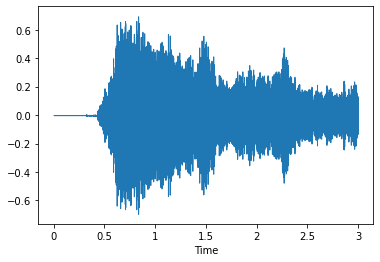

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
librosa.display.waveshow(x_1, sr=sr_1)


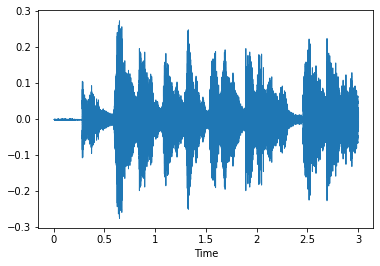

In [14]:
librosa.display.waveshow(x_2, sr=sr_2)

### Let's Consider audio 1

Spectrogram -signal strength

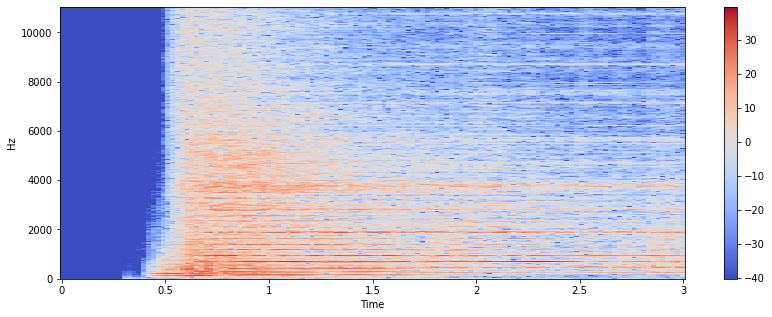

In [15]:
X = librosa.stft(x_1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5)) # Defines sizr of graph
librosa.display.specshow(Xdb, sr=sr_1, x_axis='time', y_axis='hz')
plt.colorbar()

### Feature Extraction

Spectral Centroid- indicates where the center of mass for a sound is located

In [16]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x_1, sr=sr_1)[0]
spectral_centroids.shape


C:\Users\suriy\AppData\Local\Temp\ipykernel_12664\2627396302.py:2: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0458374   0.00079346
  0.01263428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x_1, sr=sr_1)[0]


(130,)

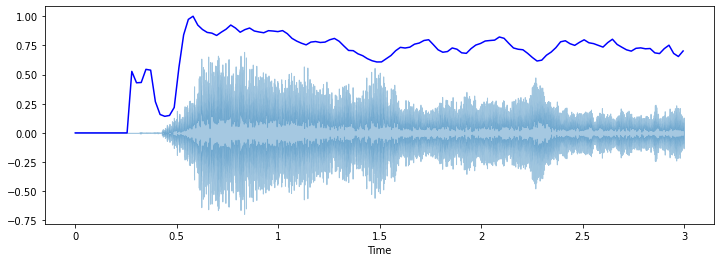

In [17]:
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x_1, sr=sr_1, alpha=0.4)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
plt.plot(t, normalize(spectral_centroids), color='b')

Zero Crossing rate - Number of time signal crossed the zero line within given limit 

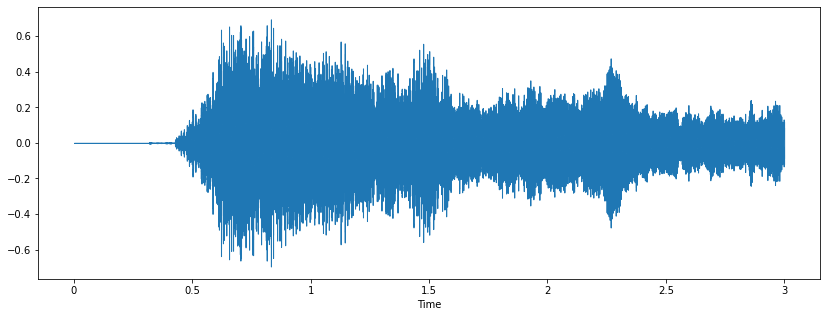

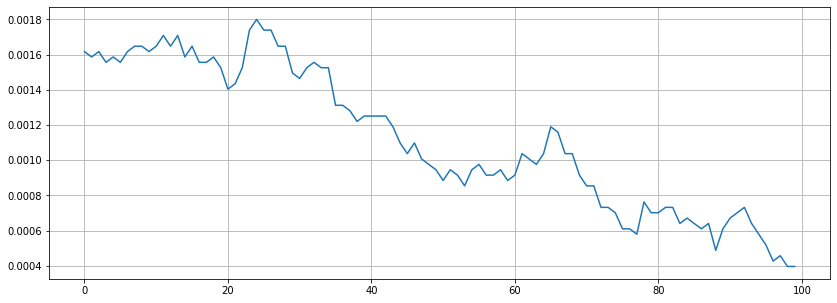

In [18]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x_1, sr=sr_1)

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x_1[n0:n1])
plt.grid()

In [19]:
zero_crossings = librosa.zero_crossings(x_1[n0:n1], pad=False)
print(sum(zero_crossings))
#here there is no line in signal crossing the zero line ( it depend upon the  audio)

0


In [20]:
print(sr_1)

22050


Mel frequency cepstral coefficients (MFCCs) -summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [21]:
mfccs = librosa.feature.mfcc(y=x_1, sr=sr_1, n_mfcc=50)
print(mfccs.shape)

(50, 130)


In [22]:
mfccs # these are the patterns that has been extracted from audio based on time and frequency 

array([[-6.1374310e+02, -6.1374310e+02, -6.1374310e+02, ...,
        -1.2646329e+02, -1.2996910e+02, -1.5111542e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         6.8776947e+01,  7.5720116e+01,  8.0217468e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.6454983e+01, -3.8077751e+01, -2.6551132e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.8885312e+00,  3.4757978e-01,  2.3783092e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.1190130e+01, -9.3716240e+00, -9.0676489e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.5965973e+00, -2.2835646e+00, -4.0576105e+00]], dtype=float32)

### Now we need to append these features  of all the audios with their 'Class label' ( dependent variables) 
Import new audios set with their metadata


In [23]:
import pandas as pd
import os
import librosa

audio_dataset_path='C:\\Users\\suriy\\Murtiwala ML Internship\\Audios'
metadata=pd.read_csv('C:\\Users\\suriy\\Murtiwala ML Internship\\Metadata.csv')
metadata.head(8)

,slice_name,duration,class
0,BabyElephant.wav,4,happy
1,Cantina.wav,2,happy
2,Fanfare60.wav,2,sad
3,PinkPanther30.wav,1,anger
4,preamble10.wav,3,anger
5,StarWars.wav,3,happy
6,taunt.wav,1,sad


### Data Standartization ( having mean , standard deviation at 0 ,1 )
### Data harmonization - Combining all the datas from different sources

In [24]:

def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #data standartization
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [25]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["slice_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

7it [00:00, 26.03it/s]


In [26]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(9)

,feature,class
0,"[-282.82803, 107.86825, -9.598394, 25.963541, ...",happy
1,"[-255.03696, 70.15845, -13.464209, 1.6684134, ...",happy
2,"[-406.17618, 88.642654, -11.311361, 9.107682, ...",sad
3,"[-326.1354, 118.98917, -3.593954, 11.342014, -...",anger
4,"[-381.48517, 121.675705, 1.7489214, 30.48083, ...",anger
5,"[-161.05836, 60.138687, -18.887754, 13.528181,...",happy
6,"[-118.8347, 95.127716, -67.76399, 32.96369, -1...",sad


In [27]:
### Split the dataset into independent and dependent dataset
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

### Now x is feature and y is depentend variable 
 ### Y need to be encoded

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [29]:
x

array([[-2.82828033e+02,  1.07868248e+02, -9.59839439e+00,
         2.59635410e+01,  5.57401371e+00,  7.05250692e+00,
        -1.92514634e+00, -2.86643100e+00, -4.42261124e+00,
        -3.63408375e+00, -9.56585789e+00, -2.63019609e+00,
        -4.50352812e+00, -7.66005278e+00, -6.13001537e+00,
        -2.79059577e+00, -5.23480129e+00,  2.48378849e+00,
         2.83894348e+00, -6.08200598e+00, -5.99307585e+00,
        -2.56967878e+00, -8.98177683e-01, -2.21821761e+00,
        -3.77904743e-01, -4.15697135e-02, -5.38062513e-01,
        -2.51378703e+00, -3.50435448e+00, -5.71087241e-01,
         8.11598450e-02, -3.07493424e+00, -1.29816508e+00,
         6.84067547e-01,  1.64632714e+00, -1.85963213e-01,
        -1.71535277e+00, -3.88635516e+00,  7.93468297e-01,
         2.89284539e+00],
       [-2.55036957e+02,  7.01584473e+01, -1.34642086e+01,
         1.66841340e+00,  9.99502182e-01, -7.46032238e+00,
         1.27751744e+00, -6.36208296e+00, -5.60252523e+00,
        -3.90907192e+00,  6.07

In [30]:
y

array([1, 1, 2, 0, 0, 1, 2], dtype=int64)

### Train Test Split


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Using svm algorithm to train the model

In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

### Prediction the class using feature of audio that is extracted by MFCCS 

In [34]:
print(classifier.predict([[-1.18834702e+02,  9.51277161e+01, -6.77639923e+01,
         3.29636917e+01, -1.77712955e+01, -6.02862787e+00,
        -7.11210251e+00,  1.19932966e+01, -9.01420593e+00,
         6.94601583e+00, -3.60797715e+00,  3.47487068e+00,
        -2.25353861e+00,  5.56199455e+00, -5.44787264e+00,
         1.10615790e+00, -3.70067596e+00,  1.47848475e+00,
        -1.49035847e+00,  3.94401169e+00,  3.33066082e+00,
         6.42070246e+00,  1.32213080e+00,  3.64668512e+00,
         4.36057234e+00,  5.00097179e+00,  3.96496654e+00,
         1.68647444e+00,  3.34907115e-01, -1.50816703e+00,
         1.38204694e-01, -7.07638860e-01, -1.77274391e-01,
        -2.81656027e+00, -1.55338681e+00, -1.96100616e+00,
         2.12884679e-01,  2.07832567e-02,  2.18654275e+00,
        -2.12746215e+00]]))

[1]


In [36]:
print(classifier.predict([[-3.26135406e+02,  1.18989166e+02, -3.59395409e+00,
         1.13420143e+01, -6.92092562e+00,  9.00037575e+00,
         7.82200575e+00,  1.01687956e+01,  3.65473151e+00,
         8.52971458e+00, -7.62582254e+00, -6.61393881e+00,
        -7.52150726e+00, -3.80640602e+00,  1.81378949e+00,
         1.37853765e+01,  8.49216652e+00,  3.22815657e-01,
        -1.19597311e+01, -2.34019241e+01,  6.69249296e+00,
         5.04144335e+00,  1.19680052e+01, -2.20568967e+00,
        -1.64608536e+01,  9.43431377e+00, -1.43423195e+01,
         3.94943833e+00,  1.13901961e+00, -6.21148062e+00,
         3.82558942e+00,  4.00516319e+00, -2.68107200e+00,
        -4.82930756e+00, -3.00670338e+00, -9.62032700e+00,
        -1.27191484e+00,  5.73906898e+00,  1.37084019e+00,
        -1.15376396e+01]]))

[0]
